# 4.1 The two-level phase

The two-level phase consists of two stages, the core algorithm and tuning algorithm.

Here we show the different steps applied on a small network.

In [18]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import infomap
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [2]:
%reload_ext autoreload
%autoreload 2
import util

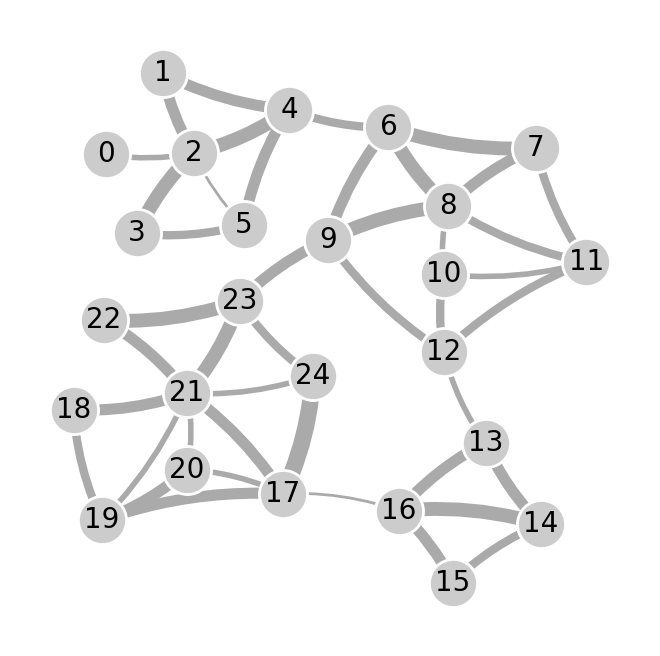

In [3]:
G, pos = util.get_map_equation_example_network()
util.plot_network(G)

## Stage 1, initialization

In stage 1, first, Infomap assigns each node to its own module. Here we provide a random partition manually and skip optimizing using `no_infomap=True`.

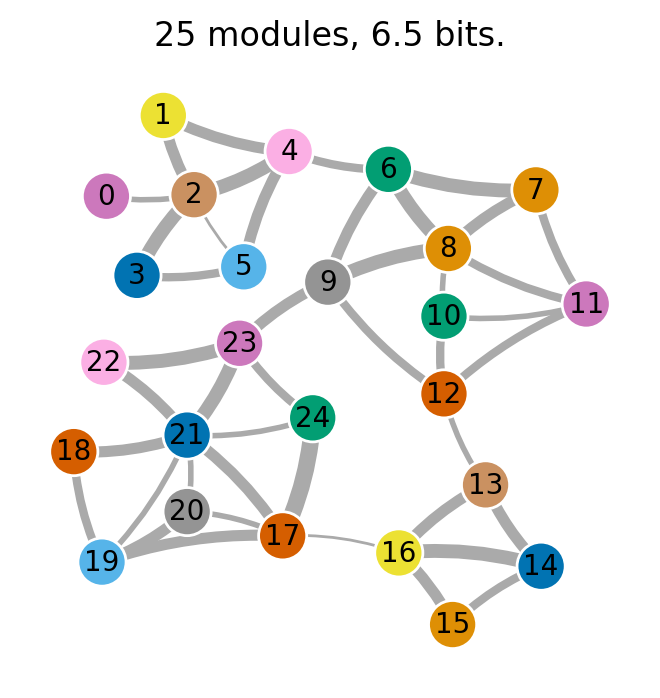

In [44]:
N = G.number_of_nodes()

partition = dict(zip(G.nodes, random.sample(range(N), N)))
util.partition(G, initial_partition=partition, no_infomap=True)
util.plot_network(G)


## Stage 1, core loop #1

For stage 1, we use `tune_iteration_limit=1` to just run the core algorithm once without any tuning.

We set `core_loop_limit=1` to just loop through the nodes once, and `core_level_limit` to not re-apply the core loops on the merged level. After one core loop we get this result:

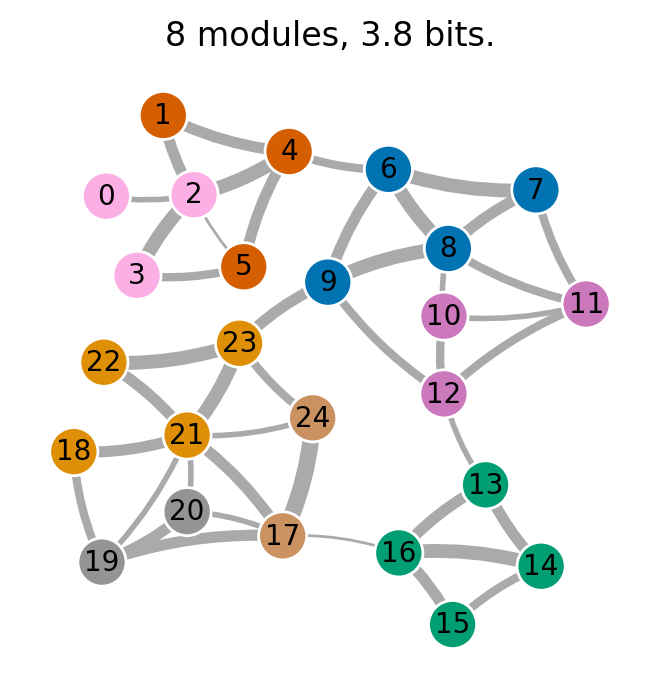

In [45]:
util.partition(G, two_level=True, core_loop_limit=1, core_level_limit=1, tune_iteration_limit=1)
util.plot_network(G)

## Stage 1, core loop #2

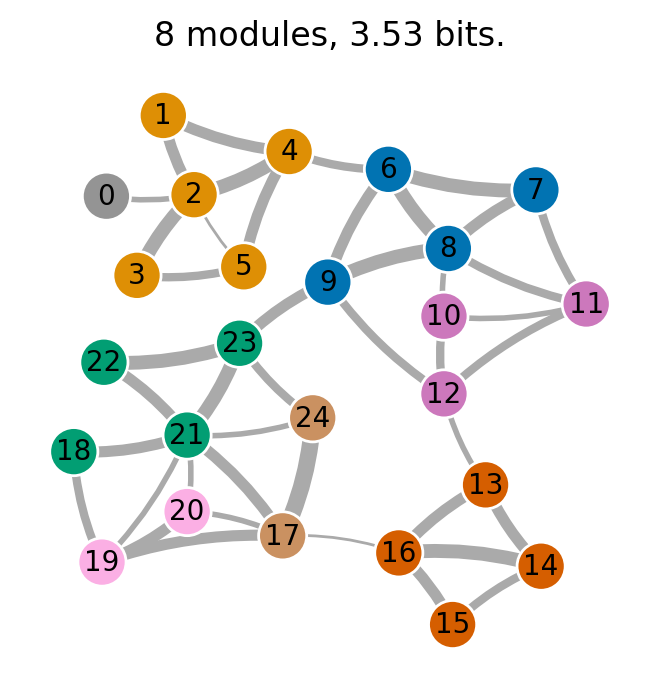

In [48]:
util.partition(G, two_level=True, core_loop_limit=2, core_level_limit=1, tune_iteration_limit=1)
util.plot_network(G)

## Stage 1, core loop #3

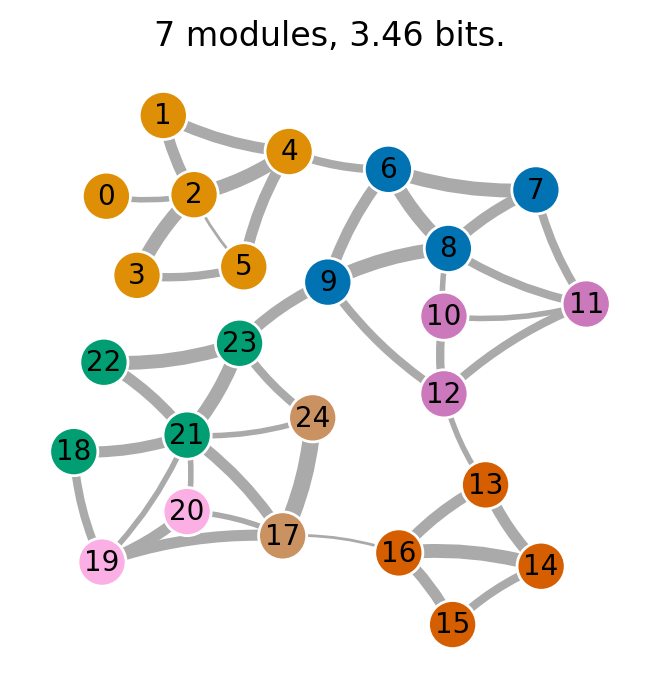

In [49]:
util.partition(G, two_level=True, core_loop_limit=3, core_level_limit=1, tune_iteration_limit=1)
util.plot_network(G)

## Stage 1, core loop #4

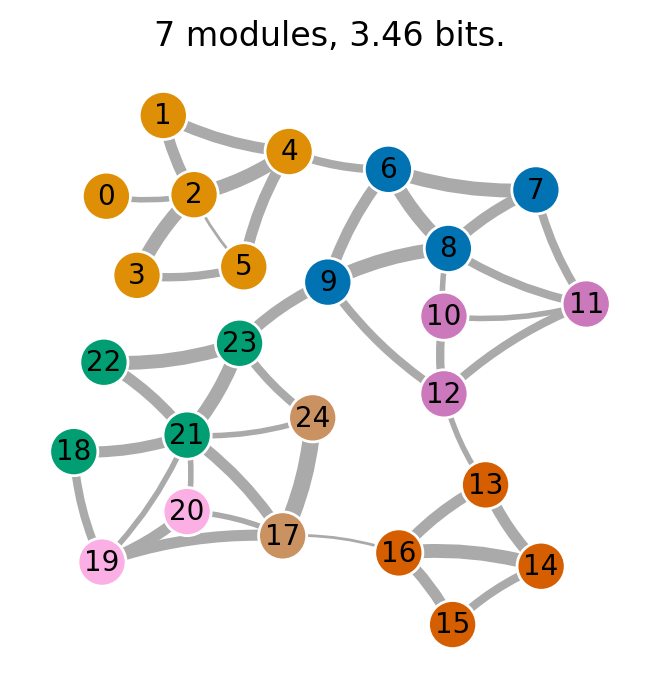

In [50]:
util.partition(G, two_level=True, core_loop_limit=4, core_level_limit=1, tune_iteration_limit=1)
util.plot_network(G)

## Stage 1, level 2
In the last core loop, there was no improvement. Then Infomap tries to move groups of nodes instead of single nodes. This is done by rebuilding a new network where each module is a new node at level 2, and links between nodes at level 1 are aggregated to nodes at level 2.

Even with only one core loop, this step will move the groups of nodes into the optimal modules.

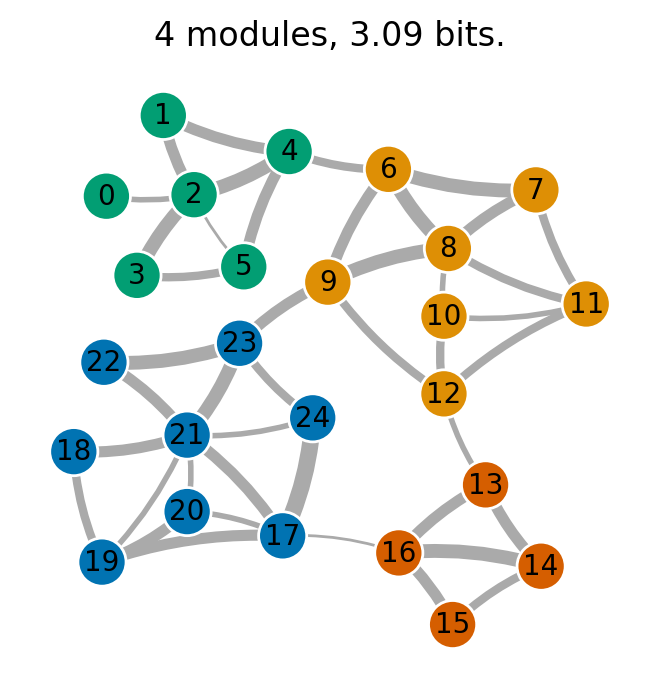

In [51]:
util.partition(G, two_level=True, core_loop_limit=1, core_level_limit=2, tune_iteration_limit=1)
util.plot_network(G)

## Stage 2, tuning

To demonstrate the effect of the tuning step, we need a network that makes it easier to fall into local optima.

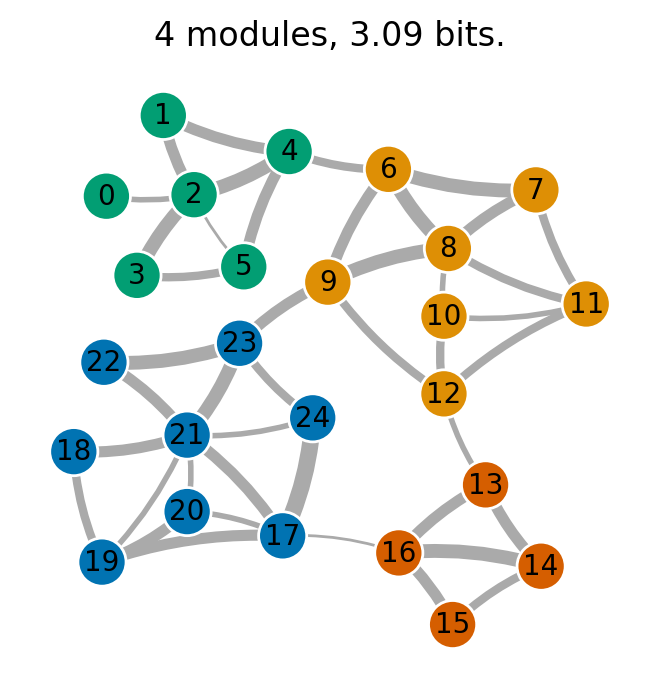

In [58]:
util.partition(G, two_level=True)
util.plot_network(G)